In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


In [66]:
training_x = pickle.load( open( '../../Data/RentalListingData/sample_training_images.pkl', 'rb' ) )
training_y = pickle.load( open( '../../Data/RentalListingData/sample_training_outputs.pkl', 'rb' ) )

In [4]:
def plotImage(sample):
    plt.figure(figsize=(8,8))
    plt.imshow(sample)
    plt.show()

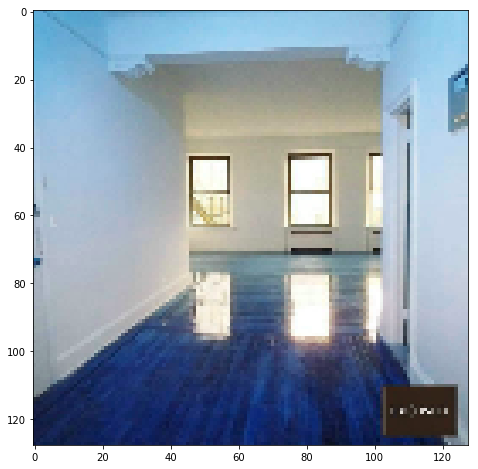

In [5]:
plotImage(training_x[32])

In [51]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=[128, 128, 3], activation='relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(45, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

In [52]:
nb_epoch = 30
batch_size = 32

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')     

In [53]:
history = LossHistory()

training_x = np.array(training_x).astype(float)
training_y = np.array(training_y).astype(float)

In [54]:
model.fit(training_x, training_y, batch_size=batch_size, nb_epoch=nb_epoch,
              validation_split=0.20, verbose=0, shuffle=True, callbacks=[history, early_stopping])

Epoch 00012: early stopping


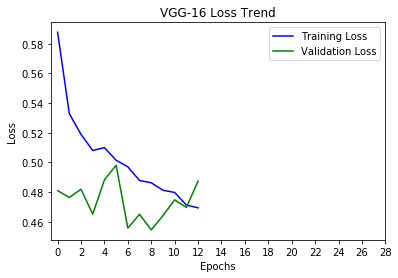

In [55]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [56]:
predictions = model.predict(training_x, verbose=0)

In [57]:
predictions[3]

array([ 0.44099757,  0.36617419,  0.19282825], dtype=float32)

I am 52.29% sure this property yields low interest
3637


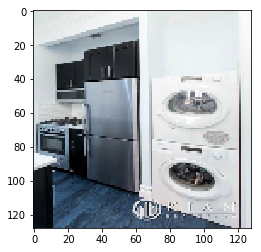

Im not really sure what interest this property yields
3653


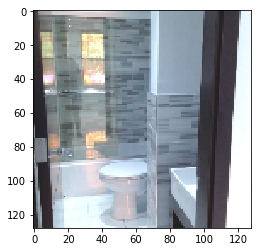

I am 55.62% sure this property yields low interest
2905


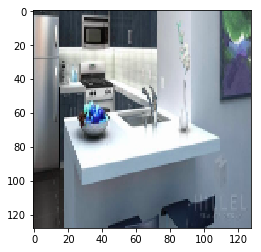

Im not really sure what interest this property yields
2892


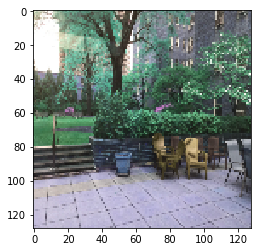

I am 73.48% sure this property yields low interest
3046


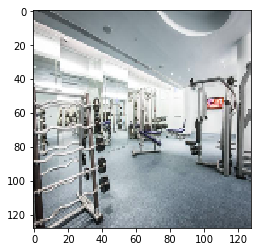

Im not really sure what interest this property yields
3536


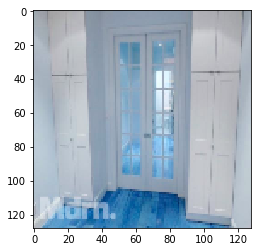

Im not really sure what interest this property yields
3298


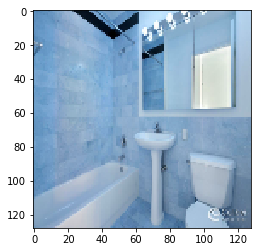

I am 50.59% sure this property yields low interest
542


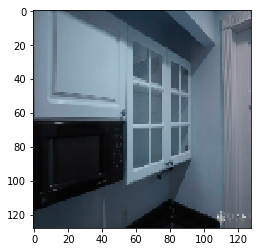

Im not really sure what interest this property yields
3062


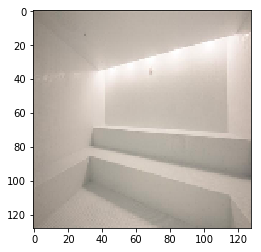

I am 65.58% sure this property yields low interest
359


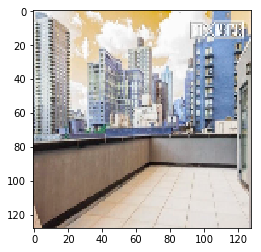

I am 50.16% sure this property yields low interest
3275


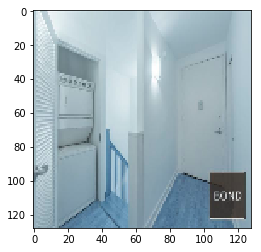

I am 57.69% sure this property yields low interest
3295


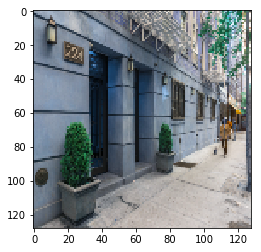

I am 74.92% sure this property yields low interest
281


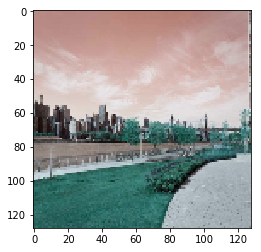

Im not really sure what interest this property yields
2958


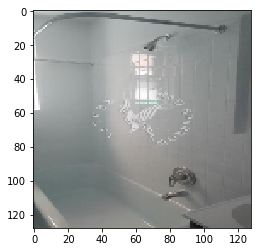

I am 54.99% sure this property yields low interest
2319


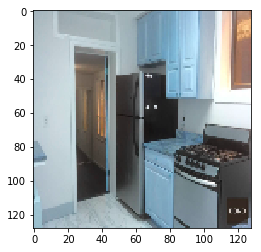

In [67]:
for i in np.random.randint(0,4000,15):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this property yields low interest'.format(predictions[i][0]))
        print(i)
    elif predictions[i,1] >= 0.5:
        print('I am {:.2%} sure this property yields medium interest'.format(predictions[i][1]))
        print(i)
    elif predictions[i,2] >= 0.5:
        print('I am {:.2%} sure this propertry yields high interest'.format(predictions[i][2]))
        print(i)
    else:
        print('Im not really sure what interest this property yields')
        print(i)
        
    plt.imshow(training_x[i])
    plt.show()

In [74]:
print(predictions[2958])
print(training_y[2958])

[ 0.43236977  0.36074603  0.20688422]
[0, 1, 0]
